## Background

### II.1. Review of X-ray Diffraction

Recall that the Bragg equation relating the Bragg angle of x-ray reflections and distances between lattice planes is: 

$$\lambda = 2 d_{hlk} *sin(\theta_b)$$

We’ll focus on cubic crystals to make the formulas more intuitive.  For a material with a cubic crystal structure and lattice parameter ao, the distance between planes, dhkl, with indices hkl is:

$$d_{hkl} = \frac{a}{\sqrt{h^2+k^2+l^2}}$$

One (not-so-good) way to estimate the lattice parameter is to measure the Bragg angle for several diffraction peaks, determining a value for a from each Bragg angle, and averaging the answers.  However, because (a) d depends on sin$\theta$ , not $\theta$, in Braggs law and (b) systematic errors occur in x-ray powder diffraction, there are approaches to determining a from a set of Bragg angle measurements that will yield far more precise values than averaging.


To understand the errors further, first differentiate Bragg equation to find the error in a that results from an error $\Delta \theta $ in the measured Bragg angle.  Start with:


$$d_{hkl}=\frac{\lambda}{2 sin(\theta_B)}$$


Once we differentiate both sides and substitute this definition back in we get:


$$\Delta d_{hkl}=-d_{hkl}\frac{cos(\theta_B)}{sin(\theta_B)} *\Delta\theta_B$$

It’s more useful to have this in terms of a instead of d.  Use $\Delta d/d=\Delta a/a$.

 $$\Delta a = -a \frac{cos(\theta_B)}{sin(\theta_B)}*\Delta\theta_B$$


X-rays propagating in a material lose intensity via absorption.  The intensity at distance x along the propagation of the beam into the sample is I(x) such that

$$I(x)=I(0)exp⁡(-μx)$$

Here $\mu$ is called the absorption constant and it has units of 1/length, commonly 1/cm.

### II.2.1. Transparency Error

Transparency error arises because the x-ray beam is not diffracted not only from the surface of the sample, but also from a line that penetrates into the sample as the beam is absorbed. The diffracted x-ray beams from all along this line are diffracted to the same 2$\theta$ angle, but they reach the detector at different places and thus show up in the diffraction pattern at different apparent angles.  This effect is illustrated in Figure 1.

<center>
<img style="display:inline-block; " alt="Transp" class="plain" src="img/TransparencyError.png" height=400 width=400/> &nbsp;&nbsp;
</center>

## Start of Assignment:

### Step1: Open the Au diffraction pattern. '

Look to see what the numpy function `np.loadtxt` does!

In [1]:
import numpy as np

In [2]:
np.loadtxt?

In [3]:
import numpy as np
filepath = "Lab5/Au calibrated.txt"
au_diff_pattern = np.loadtxt(filepath,skiprows=1)

## Step 2. Record the angles associated with the Bragg reflections.

Make a scatter plot of the intensity as a function of the 2$\theta$ angle.

Find the peak positions of each of diffraction peaks!

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.plot?

<IPython.core.display.Javascript object>


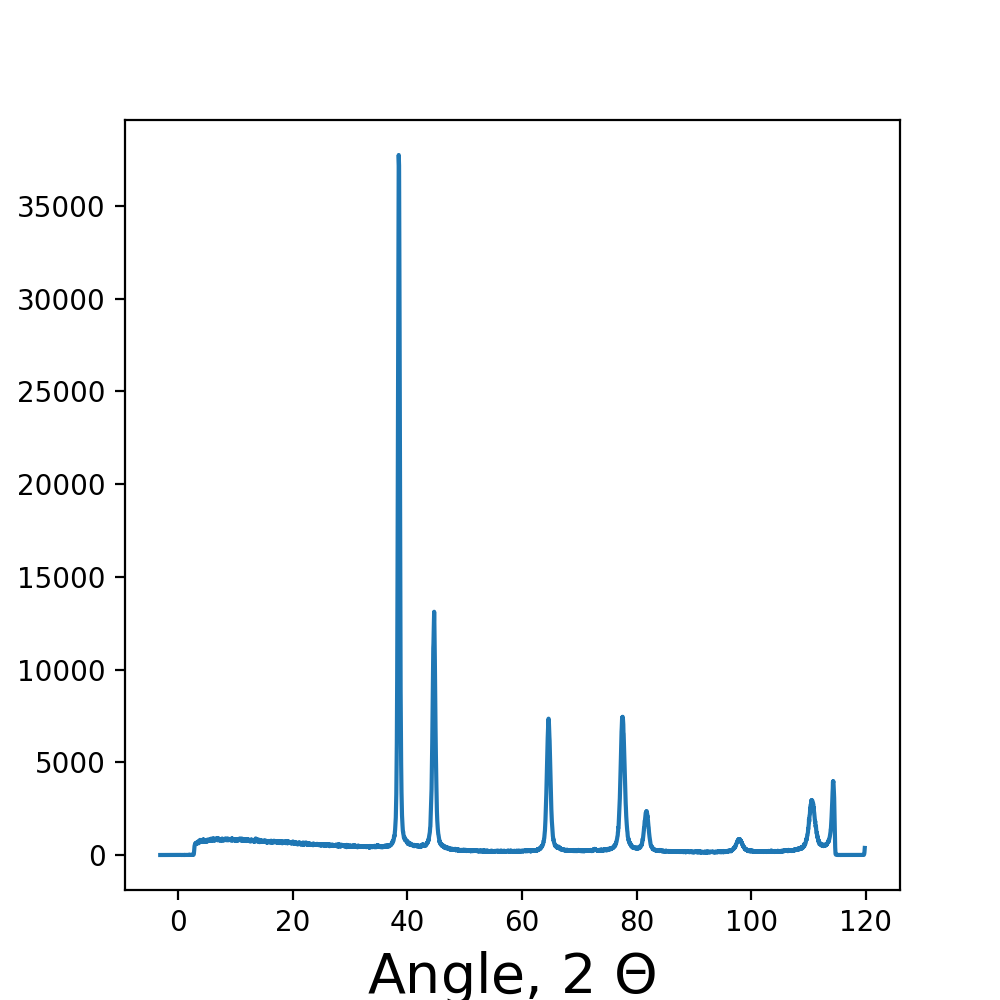

In [7]:
%matplotlib notebook
plt.figure(figsize=(5,5))
plt.plot(au_diff_pattern[:,1],au_diff_pattern[:,2])
plt.xlabel("Angle, 2 $\Theta $ ",size=20)
plt.ylabel("Counts, a.u. ", size=20)
plt.show()

Figure 1: A plot of the XRD trace

### Finding Peaks in the data

In [211]:
from scipy.signal import find_peaks

In [212]:
find_peaks?

In [ ]:
peak_ind, heights = find_peaks(au_diff_pattern[:,2], height=800, width=10)

In [ ]:
peaks = au_diff_pattern[peak_ind][1:-1] #remove first and last peak

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(au_diff_pattern[:,1],au_diff_pattern[:,2])
plt.scatter(peaks[:,1],peaks[:,2], s=100)
plt.xlabel("Angle, 2 $\Theta $ ",size=20)
plt.ylabel("Counts, a.u. ", size=20)

### Step3: Compute values of d and a for each reflection using the Bragg equation and the measured values of 2$\theta$.

Use 

$$d_{hkl}=\frac{\lambda}{2 sin(\theta_B)}$$


$$d_{hkl} = \frac{a}{\sqrt{h^2+k^2+l^2}}$$

In [154]:
# create functions which when given lambda, theta returns d 
# and when give d and hkl returns a
def get_dhkl(theta, l):
    d = l/(2*np.sin(np.deg2rad(theta)))
    return d

def d_to_a(d,hkl):
    hkl_mag = np.sqrt(np.sum(np.square(hkl),axis=1))
    return np.multiply(d,hkl_mag)
    

In [155]:
fcc_hkls = [[1,1,1],
           [2,0,0],
           [2,2,0],
           [3,1,1],
           [2,2,2],
           [4,0,0],
           [3,3,1],
           ]

In [156]:
l = 1.5042
d = get_dhkl(peaks[:,1]/2,l)
a = d_to_a(d, fcc_hkls)

### Step4/5: Compute values of cos2($\theta$B) for each of the reflections.

Make a plot of the measured values of a vs. cos2($\theta_B$).

In [163]:
cos2b = np.cos(np.deg2rad(peaks[:,1]/2))**2

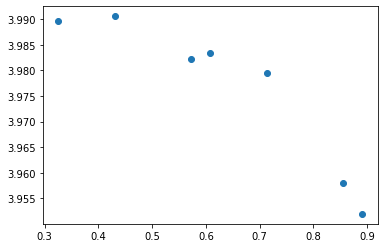

In [165]:
plt.scatter(cos2b,a)

### Step6: Fit a linear curve to the plot.

Record the intercept for this fit in your lab notebook.  Does it match the expected value of the lattice parameter of Al?  Comment in your lab book.

In [166]:
np.polyfit?

In [168]:
m,b = np.polyfit(cos2b,a,deg=1)

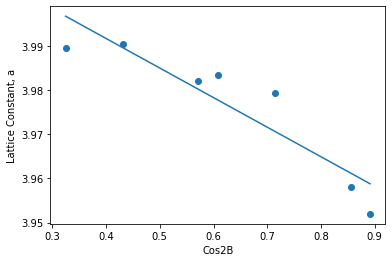

In [185]:
plt.scatter(cos2b,a)
plt.plot(cos2b, m*cos2b+b)
plt.xlabel("Cos2B")
plt.ylabel("Lattice Constant, a")
plt.show()

In [173]:
print("The Lattice Parameter was found to be: ", b)

The Lattice Parameter was found to be:  4.018617920829153


## Step7-9: Now we will find the error in the height of the sample.
Make an array of $2\theta$ angles for each reflection that would be given by the lattice constant you found in step 6.  Subtract the measured value from this value to find $\Delta2\theta_\alpha$. 


In [176]:
def a_to_2theta(a, hkl,l):
    hkl_mag = np.sqrt(np.sum(np.square(hkl),axis=1))
    d = a/hkl_mag
    
    theta = np.rad2deg(np.arcsin((d/ l *2)**-1))*2
    return theta

In [178]:
new_theta = a_to_2theta(b, fcc_hkls, l)

In [190]:
delta_theta = peaks[:,1]-new_theta
m,b = np.polyfit(np.sin(peaks[:,1]),delta_theta,deg=1)

The Slope is:  -0.2472725883523862


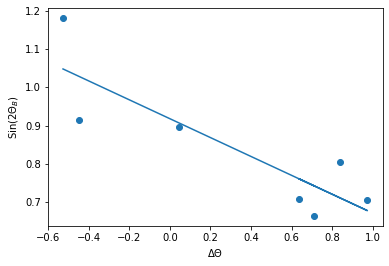

In [192]:
plt.scatter(np.sin(peaks[:,1]),delta_theta)
plt.plot(np.sin(peaks[:,1]), m*np.sin(peaks[:,1])+b)
plt.xlabel("$\Delta\Theta$")
plt.ylabel("Sin(2$\Theta_B)$")
print("The Slope is: ", m)